<a href="https://colab.research.google.com/github/Ajayisegun23/Car-Brands-Price-Predictor-App/blob/main/carpricedataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
The goal is to create a model that can predict the price value of cars in regards to other features. Vehicle dealers and potential buyers need to know cars that have high/low resale value before they are sold as new. The dataset used has a couple of variables/columns with information about car brands with the corresponding other features.

# **Data Preprocessing and EDA**

Here, the dataset is prepared for model training by cleaning and transforming the data.

This should follow the steps below:

*   import the data into the python project/environment
*   Identify and address missing data
*   Convert categorical variables into numerical format
*  Correlation of numerical features
    *  with the target
    *  with themselves
*   Handling outlier values
*  Explore non-numerical values
    *   low- and high-cardinality categorical variables
    *   non-categorical (unique) values




In [ ]:

!pip install category_encoders
!pip install streamlit

# **Import Data**
We start by importing the dataset, and to do this, we need to use (import) the required library.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.utils.validation import check_is_fitted
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact


import streamlit as st
import pickle

df = pd.read_csv("/content/drive/MyDrive/Car price dataset  analysis/car_price_dataset.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


# **Examine the Data**

In [ ]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [ ]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [ ]:
df["Engine_Size"].describe()

,Engine_Size
count,10000.000000
mean,3.000560
std,1.149324
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


# **Exploratory Data Analysis**

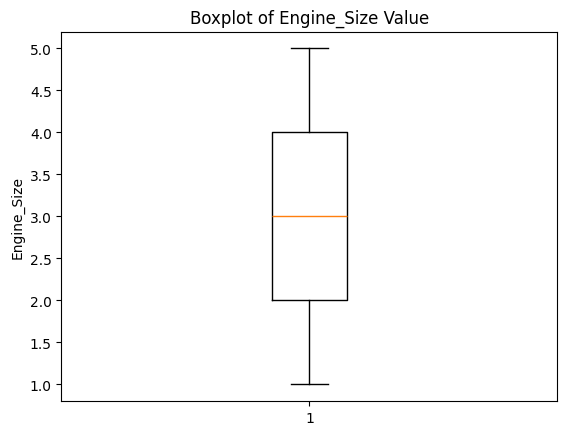

In [ ]:
plt.boxplot(df["Engine_Size"])
plt.title("Boxplot of Engine_Size Value")
plt.ylabel("Engine_Size")
plt.show()

In [ ]:
(df.isnull().sum()/len(df)*100).round()

,0
Brand,0.0
Model,0.0
Year,0.0
Engine_Size,0.0
Fuel_Type,0.0
Transmission,0.0
Mileage,0.0
Doors,0.0
Owner_Count,0.0
Price,0.0


In [ ]:
df["Year"].fillna(df["Year"].mean(), inplace=True)
df["Engine_Size"].fillna(df["Engine_Size"].mean(), inplace=True)
df["Mileage"].fillna(df["Mileage"].mean(), inplace=True)
df["Doors"].fillna(df["Doors"].mean(), inplace=True)
df["Owner_Count"].fillna(df["Owner_Count"].mean(), inplace=True)
df["Price"].fillna(df["Price"].mean(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


<ipython-input-70-f8b73c5b0e41>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Year"].fillna(df["Year"].mean(), inplace=True)
<ipython-input-70-f8b73c5b0e41>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

<Axes: >

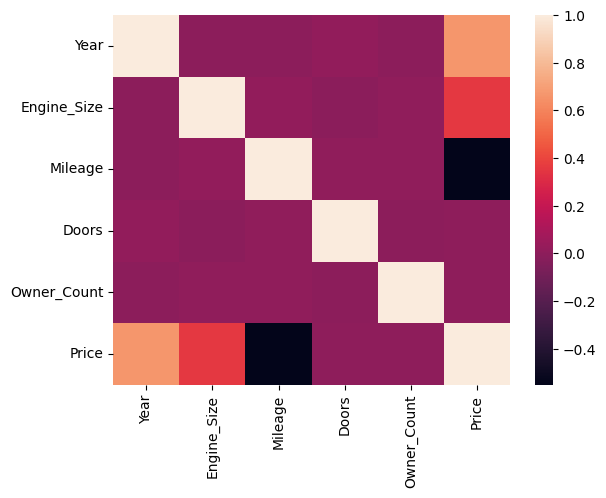

In [ ]:

# correlation for numerical values

df.select_dtypes("number").corr()

sns.heatmap(df.select_dtypes("number").corr())

In [ ]:
df[["Year","Engine_Size","Mileage","Doors","Owner_Count","Price"]].corr()
#sns.heatmap(df[["Price","Engine_Size","Mileage"]].corr()


,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
Year,1.000000,-0.001306,-0.002476,0.014867,0.000116,0.663036
Engine_Size,-0.001306,1.000000,0.015135,-0.009844,0.007122,0.357403
Mileage,-0.002476,0.015135,1.000000,0.007879,0.006287,-0.551227
Doors,0.014867,-0.009844,0.007879,1.000000,-0.005431,0.000511
Owner_Count,0.000116,0.007122,0.006287,-0.005431,1.000000,0.002656
Price,0.663036,0.357403,-0.551227,0.000511,0.002656,1.000000


In [ ]:
# let's remove columns with high correlation with other feature columns

df.drop(
    columns=["Owner_Count", "Doors"],
    inplace=True
)


<Axes: >

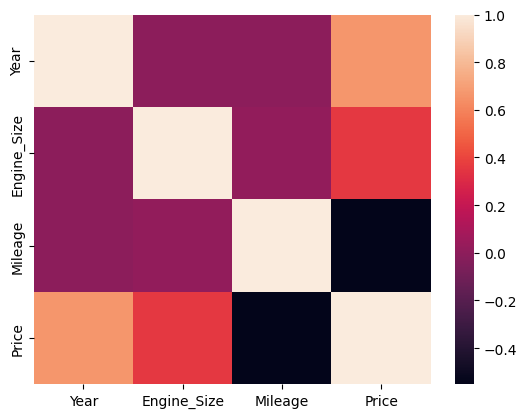

In [ ]:
# let's check the heatmap again

sns.heatmap(df.select_dtypes("number").corr())

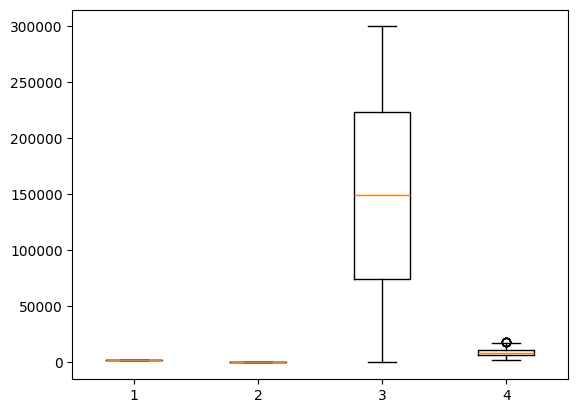

In [ ]:
# plotting a boxplot
plt.boxplot(df[["Year", "Engine_Size", "Mileage","Price"]])
plt.show()

In [ ]:
# let's remove outliers for price" column

# STEP 1: calculate 25th and 75th percentiles
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)

# print(Q1, Q3)

# STEP 2: calculate InterQuartile Range
IQR = Q3 - Q1

# print(IQR)

# STEP 3: calculate upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# print(upper_bound, lower_bound)

# STEP 4: Floor outliers (replace outlier values with upper_bound and low_bound values)
# flooring outliers above upper bound
df["Price"] = np.where(df["Price"] > upper_bound, upper_bound, df["Price"])

# flooring outliers below lower bound
df["Price"] = np.where(df["Price"] < lower_bound, lower_bound, df["Price"])

In [ ]:
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
print(IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

6646.0 11086.5
4440.5
-14.75
17747.25


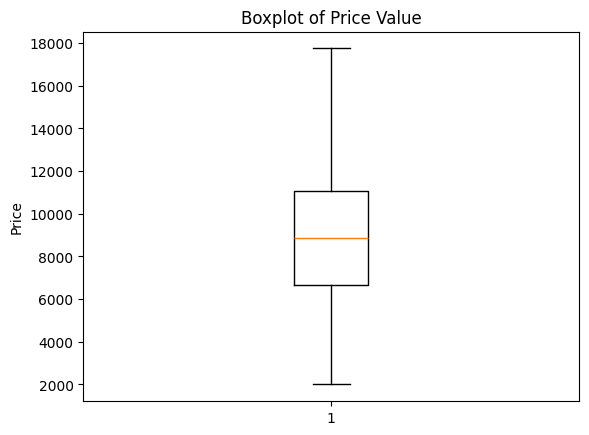

In [ ]:
plt.boxplot(df["Price"])
plt.title("Boxplot of Price Value")
plt.ylabel("Price")
plt.show()

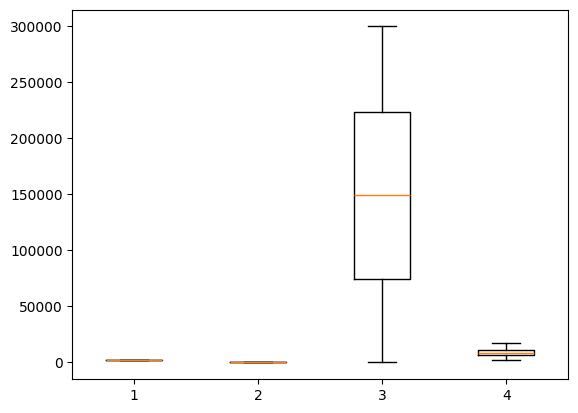

In [ ]:
# plotting a boxplot
plt.boxplot(df[["Year", "Engine_Size", "Mileage","Price"]])
plt.show()

#**Split Data**
First, we separate the rows into

Feature matrix; X, and
target vector; y
Then we split both X and y into

train data: X_train and y_train, and
test data; X_test and y_test

In [ ]:
# feature matrix and target vector

# defining the columns for feature and target
feature = ["Year", "Engine_Size", "Mileage"] # notice the square brackets around the column names
target = "Price"

# now lets use the variables above to get the corresponding data from the car_df dataframe
X = df[feature]
y = df[target]

In [ ]:
# now let's split the data into test and train

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the shapes of training and testing sets
print(f"X (feature)=>\ttrain: {X_train.shape} test:{X_test.shape} \ny (target)=>\ttrain:{y_train.shape} test:{y_test.shape}")

X (feature)=>	train: (8000, 3) test:(2000, 3) 
y (target)=>	train:(8000,) test:(2000,)


**Build Model**

Now that we have prepared the data, next is to build our model as follows:

Create baseline
Create, and train/fit the model
Evaluate the performance of the mode

In [ ]:
# creating the baseline model

# first we calculate the mean
y_mean = y_train.mean()

y_mean

8828.5245625

**Baseline**

In [ ]:
# create the baseline predictions (mean values)

y_pred_baseline = [y_mean] * len(y_train)

y_pred_baseline[:5]

[8828.5245625, 8828.5245625, 8828.5245625, 8828.5245625, 8828.5245625]

In [ ]:
# measure performance of the dumb model
# we will be using the mean absolute error (MAE)

mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print(f"Mean price value: {round(y_mean, 4)} thousand dollars")
print(f"Mean absolute error for Baseline: {round(mae_baseline, 4)} thousand dollars")

Mean price value: 8828.5246 thousand dollars
Mean absolute error for Baseline: 2553.9234 thousand dollars


**Create and Fit Model**

Here, we create our model and fit it with the training data. To do this, we are going to use a pipeline, within which we will have:

OneHotEncoder to encode categorical values
SimpleImputer to fill missing values
Ridge, instead of LinearRegression

In [ ]:
# the model

model = make_pipeline(OneHotEncoder(), SimpleImputer(), Ridge())

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[])),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [ ]:
# confirm fitting

check_is_fitted(model[-1])

**Evaluate**

Next is to evaluate the performance of the model.

In [ ]:
# let's calculate the mae for the model using training data

y_pred_training = model.predict(X_train)
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training), 4))

Training MAE: 929.1285


In [ ]:
# next, we calculate the mae for the model using test data

y_pred_test = model.predict(X_test)
print("Test MAE:", round(mean_absolute_error(y_test, y_pred_test),4))

Test MAE: 888.9577


# **Deploy**

We are going to deploy as follows:

*  a simple function,
*  a slider widget, and then
*  a streamlit app

In [ ]:
# let's create a make_prediction function

def make_prediction(Year, Engine_Size, Mileage):
    data = {
        "Year": Year,
        "Engine_Size":	Engine_Size,
        "Mileage": Mileage
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Pridicted Car Price: {prediction} thousand dollars"


In [ ]:
# lets test the function

make_prediction([2012], 4.2, 289944)

'Pridicted Car Price: 7360.33 thousand dollars'

# **Slider Widget**

In [ ]:
interact(
    make_prediction,
    Year=Dropdown(
        options=sorted(X_test["Year"].unique())
    ),
    Engine_Size=IntSlider(
        min=X_test["Engine_Size"].min(),
        max=X_test["Engine_Size"].max(),
        value=X_test["Engine_Size"].mean(),
    ),
    Mileage=IntSlider(
        min=X_test["Mileage"].min(),
        max=X_test["Mileage"].max(),
        value=X_test["Mileage"].mean(),
    )
);

interactive(children=(Dropdown(description='Year', options=(2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 20…

# **Streamlit Cloud**

*   Save the model with pickle or any  alternative library   
*   Save the Streamlit code in app.py file
*   create a github repository
    upload the model file and the app.py files to the repository
    add a requirements.txt file

*   go to https://streamlit.io/cloud, create an account, and create an app
*   follow the simple steps on https://streamlit.io/cloud, and your app should get deployed in a minute or less.









# **Saving the Model**

To use the trained model in Streamlit, it needs to be saved:

to google drive
from google drive to local drive

In [ ]:
# Saving the model to model.pkl file on google drive, using pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
# verify the model is saved

!ls


app.py	drive  model.pkl  requirements.txt  sample_data


# **Streamlit Code**

The code below configures streamlit with inputs for entering feature values, and using the model to predict a corresponding target value.

The code is then saved in an app.py file

In [1]:
# strealit

%%writefile app.py

import pickle
import streamlit as st
import numpy as np
import pandas as pd

# Load your model file
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

st.title('Car Brand Price Predictor App')

# Add input widgets for user inputs
Engine_Size = st.selectbox(
    "Engine_Size", [0:5]
)
price_in_thousands = st.slider("Price (thousand dollars)", min_value=3, max_value=53, value=26)
Mileage = st.slider("Mileage", min_value=1, max_value=5, value=2)

# When the 'Predict' button is clicked
if st.button("Predict"):
    # Prepare the input data as a DataFrame (since pipelines often expect a DataFrame)
    input_data = pd.DataFrame({
        'Year': [Year],
        'Engine_Size': [Engine_Size],
        'Mileage': [Mileage]
    })
    prediction = model.predict(input_data)[0].round(2)
    st.write(f'The predicted value is: {prediction} thousand dollars')


Writing app.py


**requirements.txt file** Deploy the Streamlit app, a requirements.txt file has to be included in the github repository.

Run the code below to create the requirements.txt file

In [ ]:
%%writefile requirements.txt

streamlit
scikit-learn
numpy
pickle4
category_encoders

Overwriting requirements.txt


In [ ]:
# save model.pkl to local drive
from google.colab import files
files.download("model.pkl")
files.download("app.py")
files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Upload Files to Github**

Now you can upload the three files to the github repository you created